<a href="https://colab.research.google.com/github/AngelTroncoso/Agentes_Gratis/blob/main/chat_memory_mas_implementacion_de_memoria_en_cadenas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

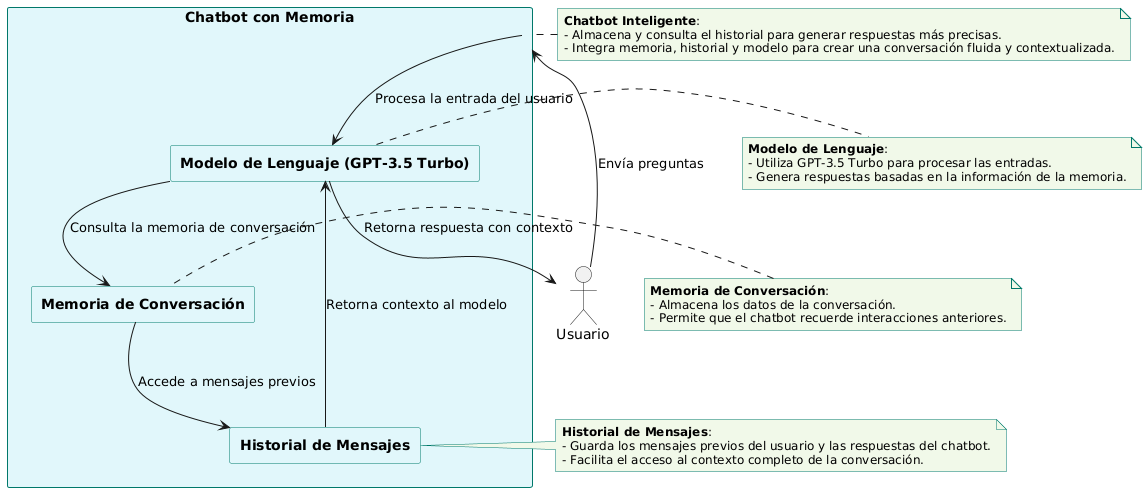

1-Chatbot con Memoria:El chatbot está diseñado para recordar las interacciones previas con el usuario. Cada vez que se realiza una nueva interacción, consulta la memoria de la conversación para acceder al contexto previo.    
2-Modelo de Lenguaje (GPT-3.5 Turbo):  
El modelo de lenguaje utilizado (GPT-3.5 Turbo) es responsable de procesar las entradas del usuario y generar respuestas. El modelo utiliza la información almacenada en la memoria para dar respuestas basadas en el historial de la conversación.  
3-Memoria de Conversación:  
Almacena los datos de la conversación, como el nombre del usuario o temas previamente discutidos. Esto permite que el chatbot continúe una conversación de manera coherente, recordando detalles importantes.  
4-Historial de Mensajes:  
El historial guarda todas las interacciones entre el usuario y el chatbot, como los mensajes anteriores del usuario y las respuestas del modelo. Este historial es consultado por el modelo para asegurar que las respuestas sean relevantes al contexto de la conversación.  
5-Flujo de Interacción:  
El usuario envía un mensaje al chatbot.  
El chatbot utiliza el modelo de lenguaje para procesar la entrada.  
El modelo consulta la memoria y el historial de mensajes para obtener contexto.  
El modelo genera una respuesta basada en el contexto almacenado y la devuelve al usuario.  

# Chat Memory

In [ ]:
import getpass
import os

if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")

In [ ]:
!pip install langchain_openai langchain

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage

model = ChatOpenAI(model="gpt-3.5-turbo")

In [ ]:
model.invoke([HumanMessage(content='Hi! my name is bob')]).content

In [ ]:
model.invoke([HumanMessage(content='What is my name?')]).content

In [ ]:
from langchain_core.messages import AIMessage

model.invoke(
    [
        HumanMessage(content="Hi! I'm Bob"),
        AIMessage(content="Hello Bob! How can I assist you today?"),
        HumanMessage(content="What's my name?"),
    ]
).content

In [ ]:
from langchain_core.chat_history import (
    BaseChatMessageHistory,
    InMemoryChatMessageHistory,
)
from langchain_core.runnables.history import RunnableWithMessageHistory

In [ ]:
store = {}

def get_session_history(session_id: str) -> BaseChatMessageHistory:
  if session_id not in store:
    store[session_id] = InMemoryChatMessageHistory()
  return store[session_id]

In [ ]:
with_message_history = RunnableWithMessageHistory(model, get_session_history)

In [ ]:
config = {'configurable': {'session_id': 'abc2'}}

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content='Hi! I am Bob')],
     config=config
)

In [ ]:
response.content

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
     config=config
)

In [ ]:
response.content

In [ ]:
store

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content='How are you?')],
     config=config
)

In [ ]:
store

In [ ]:
config = {'configurable': {'session_id': 'abc3'}}

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
     config=config
)
response

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content='Hi! I am Carli')],
     config=config
)
response.content

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content='What is my name?')],
     config=config
)
response

In [ ]:
store

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        (
            'system', 'You are a helpful assistant. Answer all question to the best of your abity.'
        ),
        MessagesPlaceholder(variable_name='messages')

    ]
)

In [ ]:
chain  = prompt | model

In [ ]:
response = chain.invoke(
    {
        'messages': [HumanMessage(content='Hi! I am Bob')]
    }
)
response.content

In [ ]:
response = chain.invoke(
    {
        'messages': [HumanMessage(content='What is your name?')]
    }
)
response.content

In [ ]:
with_message_history = RunnableWithMessageHistory(chain,get_session_history)

In [ ]:
config = { 'configurable': {'session_id': 'abc5'}}

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content='What is your name?')],
    config=config
)
response.content

In [ ]:
response = with_message_history.invoke(
    [HumanMessage(content='Hi! I am Bob')],
    config=config
)
response.content

Resumen  
En esta clase, hemos aprendido a construir un chatbot inteligente utilizando LangChain que puede:  

Recordar interacciones anteriores mediante la implementación de un sistema de memoria conversacional.
Personalizar su comportamiento a través de plantillas de prompt que guían sus respuestas.  
Ofrecer respuestas en tiempo real a través de streaming, mejorando la experiencia del usuario al mostrar el contenido mientras se genera.  
1. Configuración del Modelo de Lenguaje  
Para este proyecto, utilizamos OpenAI GPT-3.5 Turbo como modelo de lenguaje. Este modelo procesa las entradas del usuario y genera respuestas basadas en el historial de la conversación o en el contexto que se le proporciona.  

Al principio, vimos cómo el modelo interactúa con una entrada simple, como “Hi, my name is Bob”, pero notamos que el modelo por sí solo no puede recordar esa información en futuras interacciones sin un sistema de memoria. Aquí es donde entra el sistema de memoria conversacional.  

2. Memoria Conversacional  
El sistema de memoria es esencial para crear un chatbot que recuerde el contexto de las conversaciones anteriores. Sin la memoria, el modelo de lenguaje solo puede responder en base a la información proporcionada en cada turno, sin retener datos importantes como el nombre del usuario o el tema discutido previamente.  

Para implementar esta funcionalidad:  

Se utiliza Past Chat Message History, que permite almacenar el historial de los mensajes en memoria.  
Este historial se guarda en un diccionario, donde cada conversación se asocia a un session ID. Esto permite que el chatbot recuerde información relevante para cada usuario en sesiones separadas.  
Al consultar nuevamente el nombre del usuario (“What is my name?”), el chatbot puede acceder a este historial y responder correctamente (“Your name is Bob”).
Este sistema es especialmente útil en aplicaciones que requieren interacción prolongada, como en asistentes virtuales o sistemas de atención al cliente, donde recordar datos específicos del usuario mejora la personalización.  

3. Personalización mediante Prompt Templates  
Utilizamos Prompt Templates para guiar el comportamiento del chatbot. Estas plantillas permiten establecer el tono y la estructura de las respuestas, asegurando que el chatbot actúe de manera coherente y adecuada al contexto proporcionado por el historial.  

La plantilla define cómo se deben comportar las respuestas del modelo, y el chatbot ajusta su interacción en función de la información almacenada en la memoria. De este modo, el asistente puede adaptarse al contexto, ofreciendo respuestas personalizadas y alineadas con el historial previo.

4. Streaming para Respuestas en Tiempo Real  
La técnica de streaming permite que el chatbot muestre respuestas progresivamente a medida que se generan, mejorando la fluidez de la conversación. Esto es similar a cómo funciona ChatGPT, donde el texto se muestra de manera dinámica en lugar de esperar a que se genere completamente la respuesta.  

El uso de streaming es crucial para ofrecer una experiencia de usuario más interactiva, sobre todo en aplicaciones donde la inmediatez es importante, como en chatbots que asisten a usuarios en tiempo real.  

5. Manejo de Múltiples Usuarios con Session IDs  
Una funcionalidad avanzada de este chatbot es la capacidad de manejar múltiples usuarios a través de session IDs. Cada sesión de usuario se almacena de forma independiente, lo que permite que el chatbot maneje conversaciones simultáneas sin mezclar los contextos.  

Vimos cómo el chatbot puede recordar el nombre “Bob” en una sesión y, al cambiar a otra sesión, identificar correctamente al usuario como “Carly”. Esta capacidad de mantener múltiples sesiones separadas es esencial en aplicaciones escalables donde el chatbot necesita manejar interacciones con varios usuarios al mismo tiempo.  

6. Aplicaciones y Escenarios de Uso  
Las funcionalidades vistas en esta clase son aplicables en numerosos escenarios:  

Asistentes Virtuales Personalizados: Un chatbot con memoria es ideal para asistentes que deben recordar preferencias del usuario, historial de pedidos o consultas anteriores para proporcionar una experiencia más personalizada.
Sistemas de Atención al Cliente: Los chatbots con memoria pueden mejorar la eficiencia al recordar detalles previos, como problemas o tickets de soporte abiertos, permitiendo una resolución más rápida de problemas.  
Plataformas de Aprendizaje: Los chatbots que recuerdan el progreso de un estudiante pueden proporcionar una experiencia educativa más continua y adaptada, recordando los temas ya cubiertos y ajustando el contenido a las necesidades del alumno.  
En esta clase, hemos explorado cómo crear un chatbot que combina tres funcionalidades clave: memoria conversacional, personalización mediante prompts, y streaming de respuestas en tiempo real. Estas herramientas permiten que el chatbot no solo responda de manera coherente, sino que también retenga información importante para futuras interacciones, mejorando la experiencia del usuario.  